In [ ]:
import os
import joblib
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels import robust

In [ ]:
df = pd.read_csv('https://bit.ly/UsedCarsPrice')

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
cols = ['MetColor', 'Automatic']

In [ ]:
df[cols] = df[cols].astype(str)

In [ ]:
df.dtypes

In [ ]:
df['Price'].mean()

In [ ]:
stats.trim_mean(df['Price'], 0.1)

In [ ]:
df['Price'].median()

In [ ]:
stats.trim_mean(df['Price'], 0.5)

In [ ]:
df['FuelType'].mode()

In [ ]:
df['FuelType'].value_counts()

In [ ]:
df['FuelType'].value_counts().sort_index()

In [ ]:
df['FuelType'].value_counts(normalize = True) * 100

In [ ]:
df['Price'].quantile(np.linspace(0, 1, 100+1))

In [ ]:
df['Price'].quantile(np.linspace(0, 1, 10+1))

In [ ]:
df['Price'].quantile(np.linspace(0, 1, 4+1))

In [ ]:
df['Price'].max() - df['Price'].min()

In [ ]:
df['Price'].quantile([0, 1])

In [ ]:
df['Price'].quantile([0, 1]).diff()

In [ ]:
df['Price'].quantile([0, 1]).diff().iloc[-1]

In [ ]:
df['Price'].quantile([0.25, 0.75]).diff().iloc[-1]

In [ ]:
df['Price'].var()

In [ ]:
df['Price'].var() ** (1/2)

In [ ]:
df['Price'].std()

In [ ]:
robust.mad(df['Price'])

In [ ]:
df.describe()

In [ ]:
df.describe(include = int)

In [ ]:
df.describe(include = object)

In [ ]:
df.sort_values(by = 'KM')

In [ ]:
df = df[df['KM'].gt(1)].reset_index(drop = True)

In [ ]:
df.info()

In [ ]:
os.getcwd()

In [ ]:
os.chdir('../data')

In [ ]:
os.listdir()

In [ ]:
%time df.to_excel('Used_Cars_Price.xlsx', index = False)

In [ ]:
%time df.to_csv('Used_Cars_Price.csv', index = False)

In [ ]:
%time joblib.dump(value = df, filename = 'Used_Cars_Price.z')

In [ ]:
import os
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from GraphicSetting import *

In [ ]:
import hds_stats as hds

In [ ]:
os.getcwd()

In [ ]:
os.chdir('../data')

In [ ]:
os.listdir()

In [ ]:
df = pd.read_excel('Used_Cars_Price.xlsx')

In [ ]:
df.info()

In [ ]:
df = joblib.load('Used_Cars_Price.z')

In [ ]:
df.info()

In [ ]:
df['Price'].describe()[['min', 'max']]

In [ ]:
sns.histplot(data = df, x = 'Price', binwidth = 1000, 
             binrange = (4000, 16000), fc = '1', ec = '0')
plt.title(label = '중고차 가격의 분포');

In [ ]:
sns.kdeplot(data = df, x = 'Price', color = '0')
plt.axvline(x = df['Price'].mean(), color = 'red', lw = 0.5, ls = '-')
plt.axvline(x = df['Price'].median(), color = 'red', lw = 0.5, ls = '--')
plt.title(label = '중고차 가격의 분포');

In [ ]:
hds.plot.regline(data = df, x = 'Age', y = 'Price')

In [ ]:
hds.plot.regline(data = df, x = 'KM', y = 'Price')

In [ ]:
hds.plot.regline(data = df, x = np.log(df['KM']), y = 'Price')

In [ ]:
hds.plot.regline(data = df, x = 'HP', y = 'Price')

In [ ]:
hds.plot.regline(data = df, x = 'CC', y = 'Price')

In [ ]:
hds.plot.regline(data = df, x = 'Doors', y = 'Price')

In [ ]:
df['Doors'].value_counts().sort_index()

In [ ]:
hds.plot.regline(data = df, x = 'Weight', y = 'Price')
plt.axvline(x = 1250, color = 'red', ls = '--');

In [ ]:
sns.color_palette()

In [ ]:
hds.plot.box_group(data = df, x = 'FuelType', y = 'Price', 
                   # pal = ['skyblue', 'orange', 'purple'], 
                   pal = 'Pastel1')

In [ ]:
hds.plot.box_group(data = df, x = 'MetColor', y = 'Price', pal = 'Pastel1')

In [ ]:
hds.plot.box_group(data = df, x = 'Automatic', y = 'Price', pal = 'Pastel1')

In [ ]:
df = df[df['Doors'].ne(2) & df['Weight'].le(1250)]

In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df.shape[0]

In [ ]:
joblib.dump(value = df, filename = 'Used_Cars_Price.z')

In [1]:
import os
import joblib
import numpy as np
import pandas as pd
from scipy import stats
from GraphicSetting import *

In [19]:
np.random.seed(seed = 1234)

In [20]:
heights = stats.norm.rvs(loc = 175, scale = 5, size = 5000)

In [21]:
heights.mean()

175.12138663450918

In [22]:
heights.std()

4.9588737381446055

In [30]:
stats.norm.pdf(x = 175, loc = 175, scale = 15)

0.02659615202676218

In [31]:
stats.norm.pdf(x = 175, loc = 175, scale = 10)

0.03989422804014327

In [32]:
stats.norm.pdf(x = 175, loc = 175, scale = 5)

0.07978845608028654

In [33]:
x = np.linspace(130, 220, 100+1)
y1 = stats.norm.pdf(x = x, loc = 175, scale = 15)
y2 = stats.norm.pdf(x = x, loc = 175, scale = 10)
y3 = stats.norm.pdf(x = x, loc = 175, scale = 5)

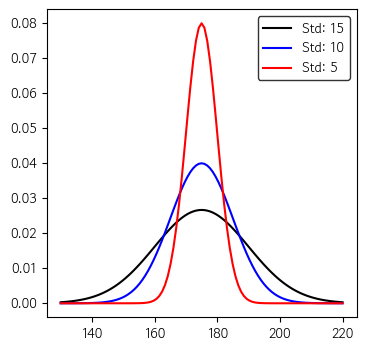

In [34]:
sns.lineplot(x = x, y = y1, color = 'black', label = 'Std: 15')
sns.lineplot(x = x, y = y2, color = 'blue', label = 'Std: 10')
sns.lineplot(x = x, y = y3, color = 'red', label = 'Std: 5');

In [35]:
stats.norm.cdf(x = 185, loc = 175, scale = 15)

0.7475074624530771

In [36]:
stats.norm.cdf(x = 185, loc = 175, scale = 10)

0.8413447460685429

In [37]:
stats.norm.cdf(x = 185, loc = 175, scale = 5)

0.9772498680518208

In [38]:
stats.norm.cdf(x = [170, 180], loc = 175, scale = 5)

array([0.15865525, 0.84134475])

In [40]:
np.diff(stats.norm.cdf(x = [170, 180], loc = 175, scale = 5))

array([0.68268949])

In [41]:
np.diff(stats.norm.cdf(x = [4, 5], loc = 3, scale = 0.5))

array([0.02271846])

In [42]:
stats.norm.ppf(q = 0.7475074624530771, loc = 175, scale = 15)

185.0

In [43]:
stats.norm.ppf(q = 0.8413447460685429, loc = 175, scale = 10)

185.0

In [44]:
stats.norm.ppf(q = 0.9772498680518208, loc = 175, scale = 5)

185.0

In [45]:
stats.norm.ppf(q = 0.95, loc = 175, scale = 5)

183.22426813475735

In [46]:
stats.norm.ppf(q = 0.99, loc = 175, scale = 5)

186.6317393702042

In [47]:
stats.skew(heights)

-0.03668062034777025

In [48]:
stats.kurtosis(heights)

-0.07067499523641407

In [49]:
stats.shapiro(heights)

ShapiroResult(statistic=0.9995919466018677, pvalue=0.396047443151474)

In [50]:
np.random.seed(seed = 1234)
heights = stats.norm.rvs(loc = 175, scale = 5, size = 10000)

In [51]:
stats.shapiro(heights)

C:\Users\hdsce\ve311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9996193051338196, pvalue=0.04346244037151337)

In [52]:
stats.anderson(heights)

AndersonResult(statistic=0.35265258232357155, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=175.08063230023598, scale=4.9761483416071846)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [53]:
def scale(x, loc, scale):
    return (x - loc) / scale

In [54]:
scale(x = 90, loc = 75, scale = 15)

1.0

In [55]:
scale(x = 55, loc = 40, scale = 10)

1.5

In [57]:
stats.zscore([90, 80])

array([ 1., -1.])

In [58]:
hgts = pd.Series(data = heights)

In [59]:
scaled = scale(x = hgts, loc = 175, scale = 5)
scaled

0       0.471435
1      -1.190976
2       1.432707
3      -0.312652
4      -0.720589
          ...   
9995   -1.048099
9996   -0.778784
9997   -1.052461
9998   -0.497693
9999   -0.256006
Length: 10000, dtype: float64

In [65]:
scaled.abs() > 3

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [67]:
locs = np.where(scaled.abs() > 3)
locs

(array([  81, 1307, 1333, 1670, 2053, 2289, 3136, 3924, 4477, 4599, 4712,
        5274, 5903, 7040, 7510, 7743, 8578, 8650, 9406, 9888], dtype=int64),)

In [83]:
np.where([True, False, False, True])

(array([0, 3], dtype=int64),)

In [70]:
scaled[locs[0]]

81     -3.563517
1307    3.125635
1333    3.109635
1670   -3.880898
2053   -3.277304
2289    3.220568
3136   -3.233505
3924   -3.434819
4477   -3.016387
4599   -3.150762
4712    3.001147
5274   -3.264204
5903   -3.599400
7040   -3.263783
7510   -3.148311
7743    3.287788
8578   -3.331437
8650   -3.858669
9406    3.037643
9888   -3.052183
dtype: float64

In [71]:
outs = hgts[locs[0]]

In [72]:
hgts.index

RangeIndex(start=0, stop=10000, step=1)

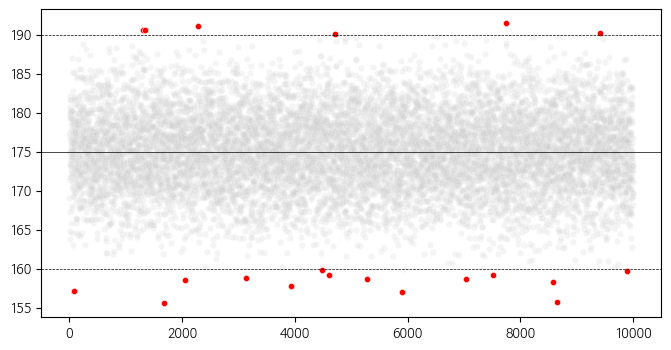

In [79]:
plt.figure(figsize = (8, 4))
sns.scatterplot(x = hgts.index, y = hgts, s = 20, color = '0.8', alpha = 0.2)
sns.scatterplot(x = outs.index, y = outs, s = 20, color = 'red')
plt.axhline(y = 175, color = '0', lw = 0.5, ls = '-')
plt.axhline(y = 190, color = '0', lw = 0.5, ls = '--')
plt.axhline(y = 160, color = '0', lw = 0.5, ls = '--');